In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

## Loading Data

In [2]:
df=pd.read_csv('exams.csv')
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
5,male,group C,some high school,standard,none,68,57,54
6,female,group E,associate's degree,standard,none,82,83,80
7,female,group B,some high school,standard,none,46,61,58
8,male,group C,some high school,standard,none,80,75,73
9,female,group C,bachelor's degree,standard,completed,57,69,77


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


## Checking for Null Values +Cleaning Data

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.rename(columns={'race/ethnicity':'Race','gender':'Gender','parental level of education':'ParentsEducation'},inplace=True)
df.head(2)

,Gender,Race,ParentsEducation,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87


In [7]:
df.Race.value_counts()

group C    323
group D    257
group B    198
group E    143
group A     79
Name: Race, dtype: int64

In [8]:
df.ParentsEducation.value_counts()

some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: ParentsEducation, dtype: int64

In [9]:
df['Race']=df['Race'].str.replace('group','')
df['ParentsEducation']=df['ParentsEducation'].str.replace('some','')

In [10]:
df.ParentsEducation.value_counts()

 college              224
high school           215
associate's degree    204
 high school          177
bachelor's degree     105
master's degree        75
Name: ParentsEducation, dtype: int64

In [11]:
df['ParentsEducation']=df.ParentsEducation.str.strip()

In [12]:
def countplot(data, hue=None, column=None, order=None, order_hue=None, saturation=1.0, label_dict=None,text=None):
    """
    Parameters:
    - data: DataFrame
        The input DataFrame.
    - hue: str, optional
        Variable in data to map plot aspects to different colors.
    - column: str, optional
        Categorical variable on the x-axis or y-axis.
    - order: list, optional
        Order to plot the categorical levels in the x-axis or y-axis.
    - order_hue: list, optional
        Order to plot the categorical levels in the hue variable.
    - ascending: bool, optional
        Whether to sort the categories in ascending or descending order.
    - saturation: float, optional
        Proportion to desaturate the plot.
    - label_dict: dict, optional
        Dictionary to map values to custom labels.

    """
    plt.figure(figsize=(10, 6))  
    
    if column:
        plt.title(text)
        ax = sns.countplot(x=column, hue=hue, data=data, order=order, hue_order=order_hue, saturation=saturation)
        plt.legend(loc='upper center')

        if order is not None and label_dict is not None:
            plt.xticks(ticks=range(len(order)), labels=[f' {i}: {label_dict[val]}' for i, val in enumerate(order)])

        # Annotate each bar with its count
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height, f'{height}', ha="center", va="bottom")

    else:
        raise ValueError("Specify either column_x or column_y")

    plt.show()

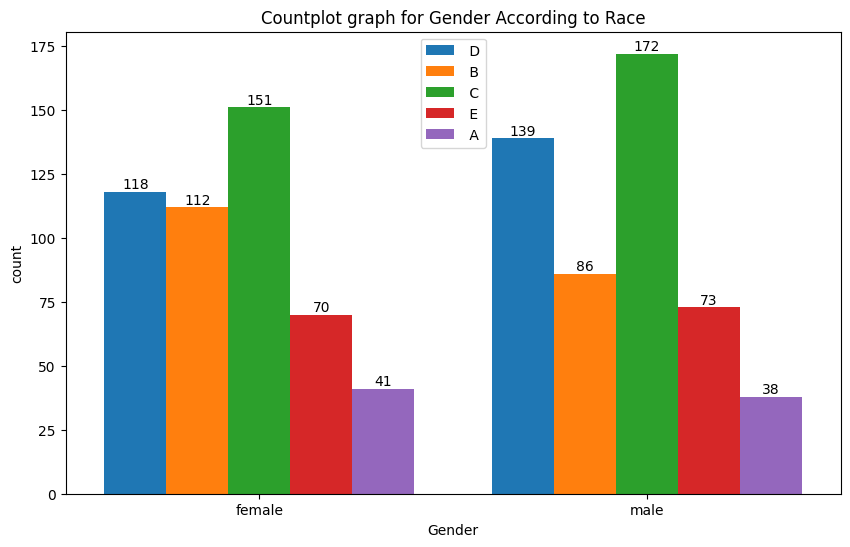

In [13]:
countplot(df,column='Gender',hue='Race',text='Countplot graph for Gender According to Race')


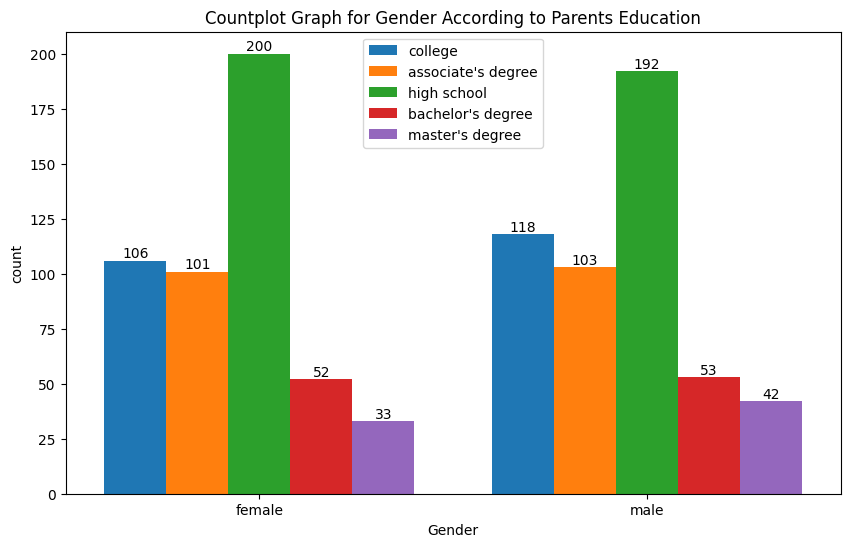

In [14]:
countplot(df,column='Gender',hue='ParentsEducation',text='Countplot Graph for Gender According to Parents Education')


In [15]:
pd.crosstab(df.ParentsEducation,df.Race)

Race,A,B,C,D,E
ParentsEducation,,,,,
associate's degree,21,41,59,59,24
bachelor's degree,4,27,35,25,14
college,15,40,79,55,35
high school,35,76,125,98,58
master's degree,4,14,25,20,12


In [16]:
df.lunch.value_counts()

standard        660
free/reduced    340
Name: lunch, dtype: int64

In [17]:
df.groupby(['Race', 'lunch']).size()

Race  lunch       
 A    free/reduced     21
      standard         58
 B    free/reduced     75
      standard        123
 C    free/reduced    113
      standard        210
 D    free/reduced     85
      standard        172
 E    free/reduced     46
      standard         97
dtype: int64

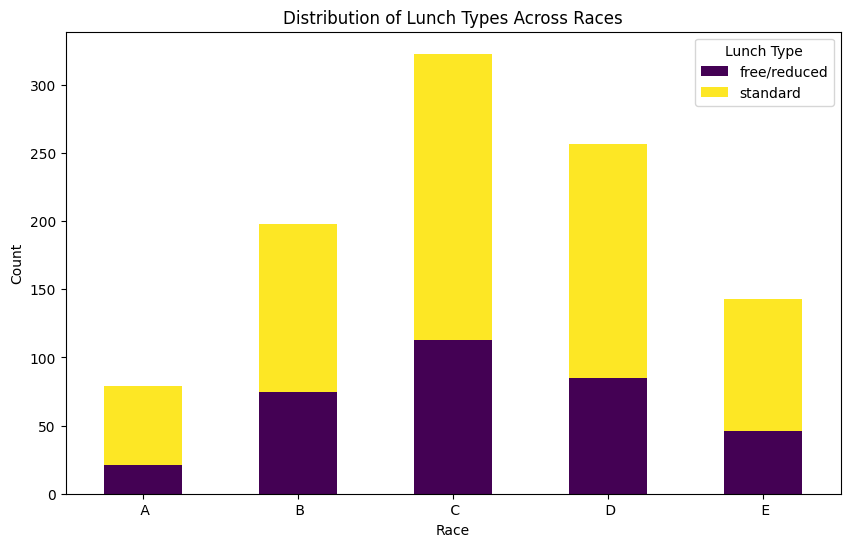

In [18]:
race_lunch_counts = df.groupby(['Race', 'lunch']).size().unstack(fill_value=0)

race_lunch_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Distribution of Lunch Types Across Races')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Lunch Type')
plt.xticks(rotation=0)
plt.show()

In [19]:
df[['ParentsEducation','lunch']]

,ParentsEducation,lunch
0,college,standard
1,associate's degree,standard
2,college,free/reduced
3,college,free/reduced
4,associate's degree,standard
...,...,...
995,college,standard
996,college,standard
997,high school,standard
998,high school,standard


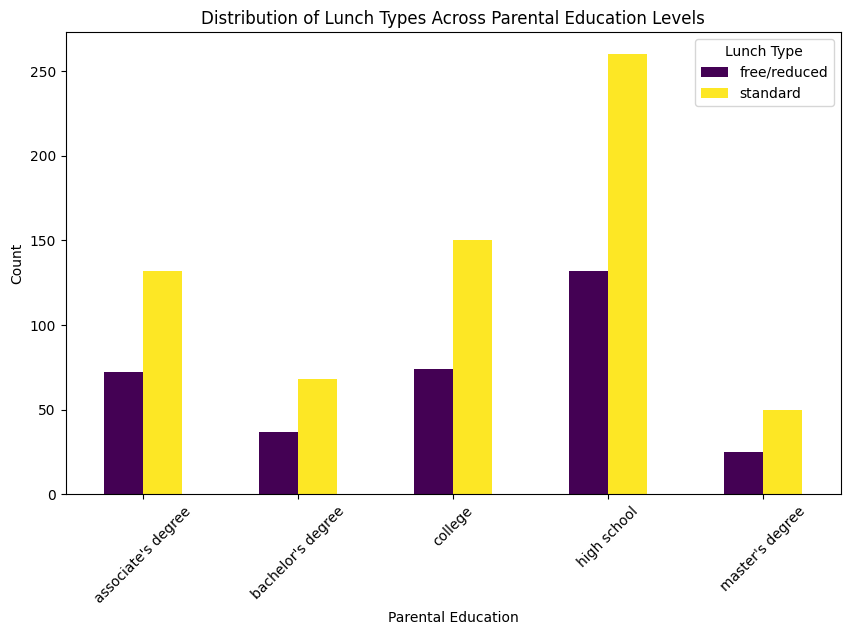

In [20]:
parent_lunch_counts = df.groupby(['ParentsEducation', 'lunch']).size().unstack(fill_value=0)

parent_lunch_counts.plot(kind='bar', figsize=(10, 6), colormap='viridis')

plt.title('Distribution of Lunch Types Across Parental Education Levels')
plt.xlabel('Parental Education')
plt.ylabel('Count')

plt.legend(title='Lunch Type')
plt.xticks(rotation=45)

plt.show()

In [21]:
df[['test preparation course','Gender','Race']]

,test preparation course,Gender,Race
0,completed,female,D
1,none,male,D
2,none,female,D
3,none,male,B
4,none,female,D
...,...,...,...
995,none,male,C
996,none,male,C
997,completed,female,A
998,none,male,E


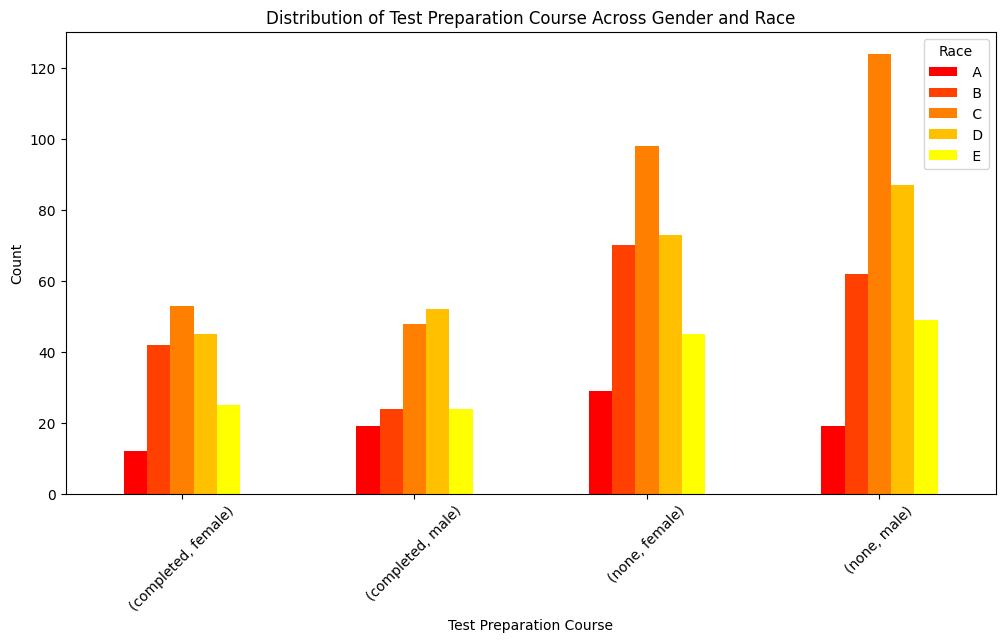

In [22]:
course_counts = df.groupby(['test preparation course', 'Gender', 'Race']).size().unstack(fill_value=0)

# Plot grouped bar plot
course_counts.plot(kind='bar', figsize=(12, 6), colormap='autumn')

# Add title and labels
plt.title('Distribution of Test Preparation Course Across Gender and Race')
plt.xlabel('Test Preparation Course')
plt.ylabel('Count')

# Show legend
plt.legend(title='Race')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show plot
plt.show()

In [23]:
df.columns

Index(['Gender', 'Race', 'ParentsEducation', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

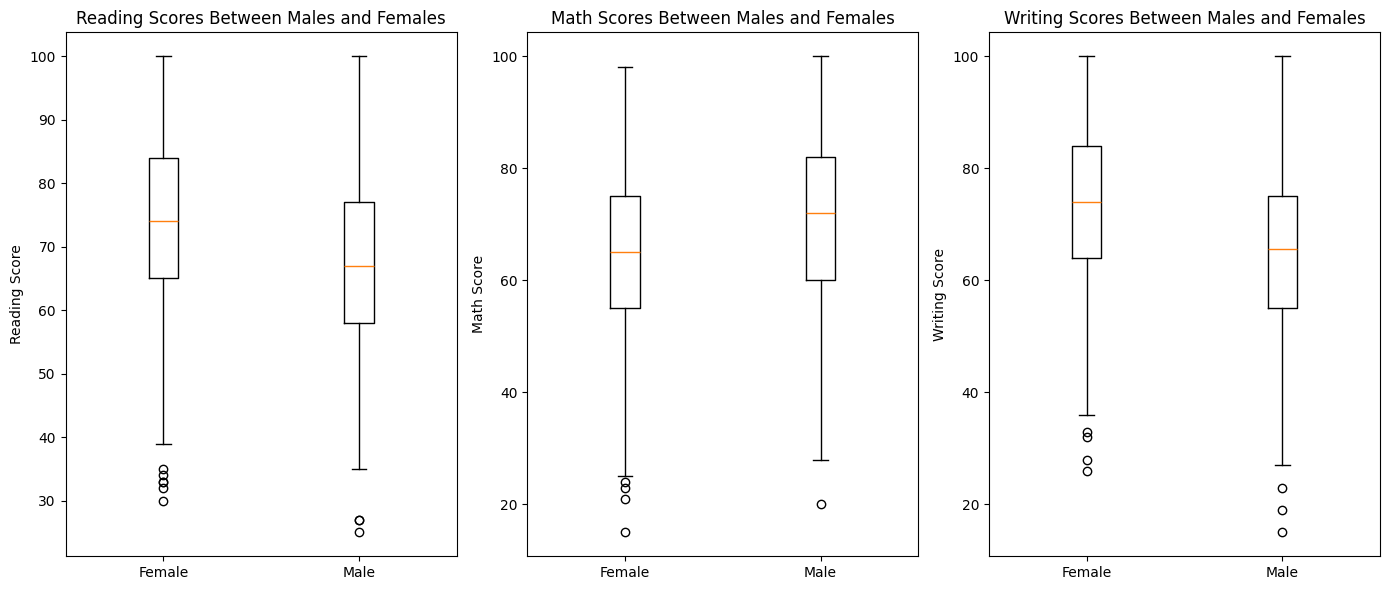

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

ax[0].boxplot([df[df['Gender'] == 'female']['reading score'], df[df['Gender'] == 'male']['reading score']],
            labels=['Female', 'Male'])
ax[0].set_title('Reading Scores Between Males and Females')
ax[0].set_ylabel('Reading Score')

# Plot box plot for males
ax[1].boxplot([df[df['Gender'] == 'female']['math score'], df[df['Gender'] == 'male']['math score']],
            labels=['Female', 'Male'])
ax[1].set_title('Math Scores Between Males and Females')
ax[1].set_ylabel('Math Score')


ax[2].boxplot([df[df['Gender'] == 'female']['writing score'], df[df['Gender'] == 'male']['writing score']],
            labels=['Female', 'Male'])
ax[2].set_title('Writing Scores Between Males and Females')
ax[2].set_ylabel('Writing Score')
plt.tight_layout()

# Show plot
plt.show()

In [25]:
## Feature Engineering-> Creating a New column -Total Scores: Addition of All scores (Writing, Math , Reading)
df['Total Score']=df['writing score']+df['reading score']+df['math score']


In [26]:
df[['writing score','reading score','math score','Total Score']].head(10)

,writing score,reading score,math score,Total Score
0,78,70,59,207
1,87,93,96,276
2,77,76,57,210
3,63,70,70,203
4,86,85,83,254
5,54,57,68,179
6,80,83,82,245
7,58,61,46,165
8,73,75,80,228
9,77,69,57,203


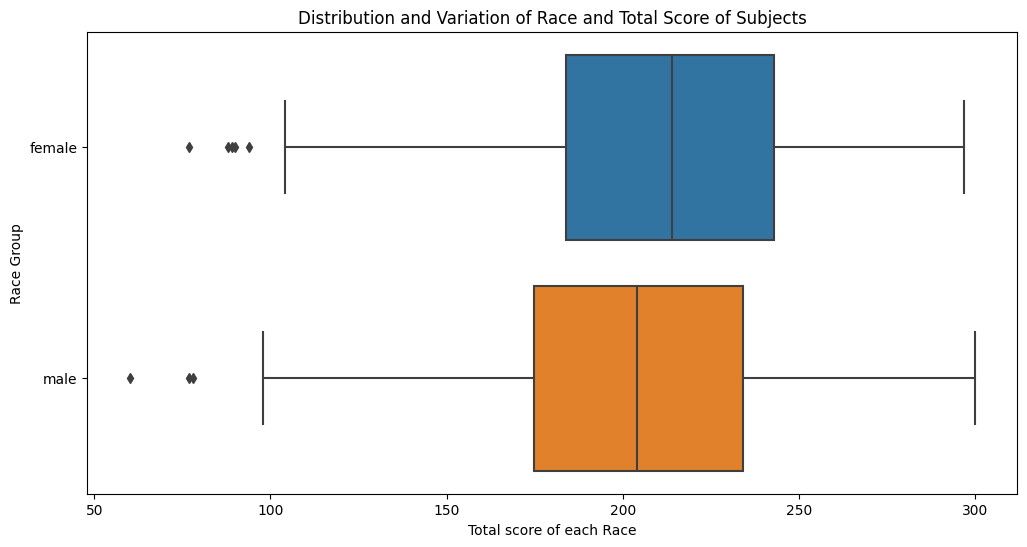

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='Total Score',y='Gender')
plt.xlabel("Total score of each Race")
plt.ylabel("Race Group")
plt.title("Distribution and Variation of Race and Total Score of Subjects")
plt.show()

In [28]:
df['Total Score'].max()


300

In [29]:
df['Total Score'].min()

60

In [30]:
df['Status'] = pd.cut(df['Total Score'], bins=[0, 100, 200,250, float('inf')], labels=['Insufficient', 'Good', 'Very Good','Excellent'])
df.Status

0      Very Good
1      Excellent
2      Very Good
3      Very Good
4      Excellent
         ...    
995    Very Good
996    Very Good
997    Very Good
998    Very Good
999         Good
Name: Status, Length: 1000, dtype: category
Categories (4, object): ['Insufficient' < 'Good' < 'Very Good' < 'Excellent']

In [31]:
df.Status.value_counts()

Very Good       417
Good            414
Excellent       160
Insufficient      9
Name: Status, dtype: int64

In [32]:
statuses = ['Very Good', 'Good', 'Excellent', 'Insufficient']
counts = [417, 414, 160, 9]

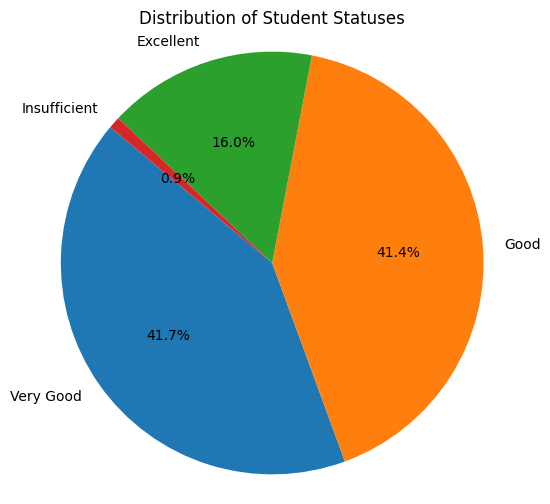

In [33]:
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=statuses, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Student Statuses')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<Figure size 2000x1000 with 0 Axes>

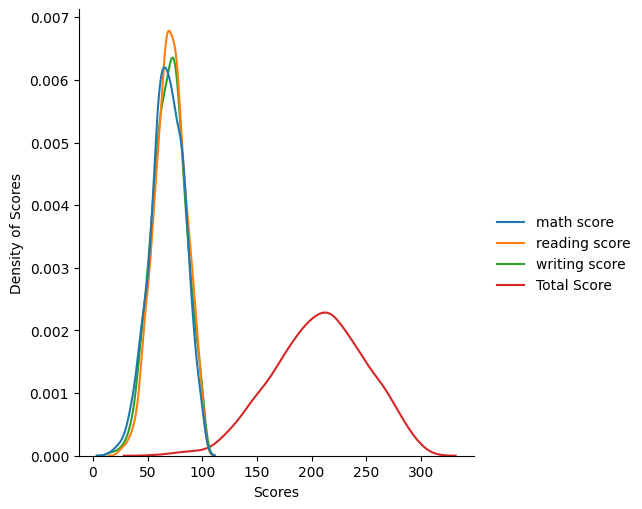

In [34]:
plt.figure(figsize=(20,10))
sns.displot(data=df[['math score', 'reading score', 'writing score','Total Score']], kind="kde")
plt.xlabel('Scores')
plt.ylabel('Density of Scores')
plt.show()